# Predicting Covid-19 Cases, fatalities for India 

In [1]:
# Import useful libraries and functions
import pandas as pd
import numpy as np
# Converting Dates into usable form like ordinal.
from datetime import datetime as dt
# Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# For Regression, Pre-processing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score

In [2]:
# Read entire world statistics data into a data frame
df = pd.read_csv('data.csv')
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [3]:
# Convert all dates into ordinal format
dates = df['Date']
i = 0
for a in dates:
    dates[i] = dt.strptime(a, '%Y-%m-%d').date()
    dates[i] = dates[i].toordinal()
    i = i+1

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
df['Date'] = dates
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,737446,Afghanistan,0,0,0
1,737446,Albania,0,0,0
2,737446,Algeria,0,0,0
3,737446,Andorra,0,0,0
4,737446,Angola,0,0,0


# India

## Add all data for India into a dataframe

In [5]:
ind_data = df[df['Country']=='India']
ind_data.head()

,Date,Country,Confirmed,Recovered,Deaths
79,737446,India,0,0,0
267,737447,India,0,0,0
455,737448,India,0,0,0
643,737449,India,0,0,0
831,737450,India,0,0,0


## Plot the cases data

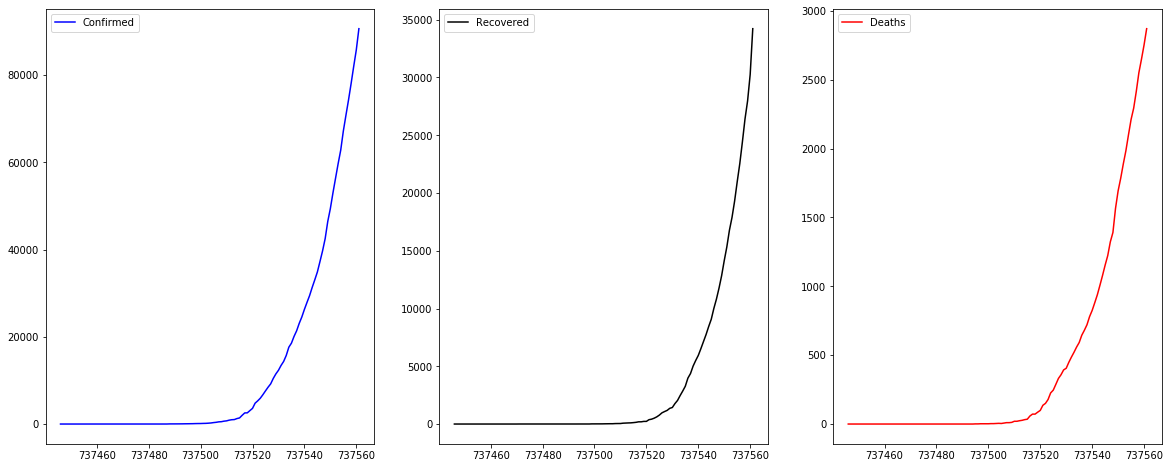

In [6]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(1,3,1)
ax1.plot(ind_data['Date'].values,ind_data['Confirmed'].values,color='b')
ax1.legend(['Confirmed'])
ax2 = fig.add_subplot(1,3,2)
ax2.plot(ind_data['Date'].values,ind_data['Recovered'].values,color='k')
ax2.legend(['Recovered'])
ax3 = fig.add_subplot(1,3,3)
ax3.plot(ind_data['Date'].values,ind_data['Deaths'].values,color='r')
ax3.legend(['Deaths'])

### All the three quantities seem to be increasing exponentially

## To fit the curves we will use polynomial Regression

In [7]:
# Copy the Date and Confirmed Values of India into another dataframe
conf_data = ind_data[['Date','Confirmed']]

In [8]:
x_conf = conf_data['Date'].values
y_conf = conf_data['Confirmed'].values

In [9]:
scale = StandardScaler()
x_norm = scale.fit_transform(x_conf.reshape(-1,1))

In [10]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_norm.reshape(-1,1),y_conf,test_size=0.2)

0.5918944956250325
0.9358653037463446
0.9953055726546024
0.9997068849075837
0.9996833022331333
0.9996788673981934


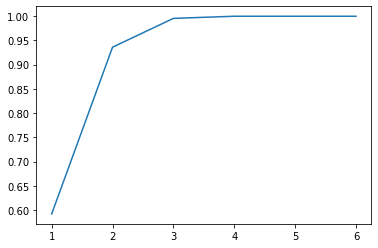

In [11]:
max_degree = 6
i=1
r_squared = []
while i<=max_degree:
    p = PolynomialFeatures(degree = i,include_bias=False)
    x_train11 = p.fit_transform(x_train1)
    x_test11 = p.fit_transform(x_test1)
    l = LinearRegression()
    l.fit(x_train11,y_train1.reshape(-1,1))
    y_pred1 = l.predict(x_test11)
    r_squared.append(r2_score(y_test1,y_pred1))
    print(r2_score(y_test1,y_pred1))
    #plt.plot(x_test11,y_pred1)
    i=i+1
plt.plot(np.arange(1,max_degree+1,1),r_squared)

### To prevent underfitting and overfitting, the point where the graph starts to flatten is to be considered, i.e 3 degree polynomial is the best fit.

In [12]:
ind_conf_model = LinearRegression()
p = PolynomialFeatures(degree = 3,include_bias=False)
x_input = p.fit_transform(x_norm)
ind_conf_model.fit(x_input,y_conf)
ind_conf_model.score(x_input,y_conf)

0.9931964807711214

In [13]:
ind_conf_model.coef_

array([ 2199.24592222, 14458.76358278,  8176.45483764])

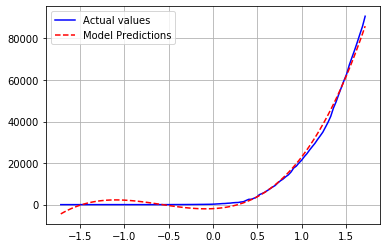

In [14]:
y_pred = ind_conf_model.predict(x_input)
plt.plot(x_norm,y_conf,color='b')
plt.plot(x_norm,y_pred,'--',color='r')
plt.legend(['Actual values','Model Predictions'])
plt.grid(True)

# Recovered India

In [15]:
rec_data = ind_data[['Date','Recovered']]

In [16]:
x_rec = rec_data['Date'].values
y_rec = rec_data['Recovered'].values
scale = StandardScaler()
x_norm = scale.fit_transform(x_rec.reshape(-1,1))
x_train2,x_test2,y_train2,y_test2 = train_test_split(x_norm.reshape(-1,1),y_rec,test_size=0.2)

0.004588689899331366
0.5318794332031467
0.9084114922042317
0.9948697294987975
0.9994859561019842
0.9992554118430096


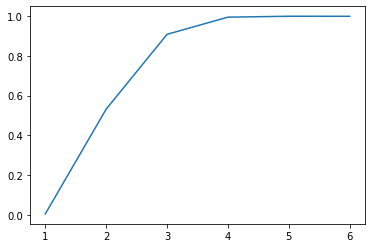

In [17]:
max_degree = 6
i=1
r_squared = []
while i<=max_degree:
    p = PolynomialFeatures(degree = i,include_bias=False)
    x_train22 = p.fit_transform(x_train2)
    x_test22 = p.fit_transform(x_test2)
    l = LinearRegression()
    l.fit(x_train22,y_train2.reshape(-1,1))
    y_pred1 = l.predict(x_test22)
    r_squared.append(r2_score(y_test2,y_pred1))
    print(r2_score(y_test2,y_pred1))
    #plt.plot(x_test11,y_pred1)
    i=i+1
plt.plot(np.arange(1,max_degree+1,1),r_squared)

In [18]:
ind_rec_model = LinearRegression()
p = PolynomialFeatures(degree = 4,include_bias=False)
x_input = p.fit_transform(x_norm)
ind_rec_model.fit(x_input,y_rec)
ind_rec_model.score(x_input,y_rec)

0.9969970545785591

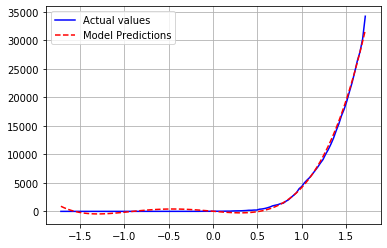

In [19]:
y_pred = ind_rec_model.predict(x_input)
plt.plot(x_norm,y_rec,color='b')
plt.plot(x_norm,y_pred,'--',color='r')
plt.legend(['Actual values','Model Predictions'])
plt.grid(True)

# Deaths

In [20]:
death_data = ind_data[['Date','Deaths']]
x_death = death_data['Date'].values
y_death = death_data['Deaths'].values
scale = StandardScaler()
x_norm = scale.fit_transform(x_death.reshape(-1,1))
x_train3,x_test3,y_train3,y_test3 = train_test_split(x_norm.reshape(-1,1),y_death,test_size=0.2)

0.6328545221369386
0.9226665491396487
0.9928894955286587
0.9985558049619259
0.9985812361135515
0.9987029861034542


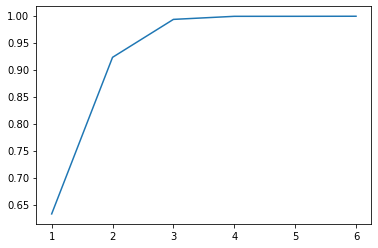

In [21]:
max_degree = 6
i=1
r_squared = []
while i<=max_degree:
    p = PolynomialFeatures(degree = i,include_bias=False)
    x_train33 = p.fit_transform(x_train3)
    x_test33 = p.fit_transform(x_test3)
    l = LinearRegression()
    l.fit(x_train33,y_train3.reshape(-1,1))
    y_pred1 = l.predict(x_test33)
    r_squared.append(r2_score(y_test3,y_pred1))
    print(r2_score(y_test3,y_pred1))
    #plt.plot(x_test11,y_pred1)
    i=i+1
plt.plot(np.arange(1,max_degree+1,1),r_squared)

In [22]:
ind_death_model = LinearRegression()
p = PolynomialFeatures(degree = 3,include_bias=False)
x_input = p.fit_transform(x_norm)
ind_death_model.fit(x_input,y_death)
ind_death_model.score(x_input,y_death)

0.9935783512944971

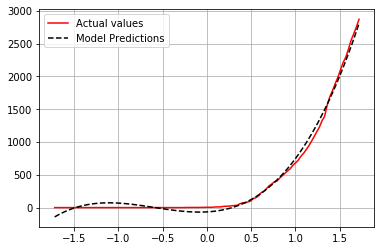

In [23]:
y_pred = ind_death_model.predict(x_input)
plt.plot(x_norm,y_death,color='r')
plt.plot(x_norm,y_pred,'--',color='k')
plt.legend(['Actual values','Model Predictions'])
plt.grid(True)